In [1]:
### Longitudinal analysis and visualization in Google Colab with Python
# Import df_long data, generated in R, from my drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/MyDrive/df_long.csv")

Mounted at /content/drive


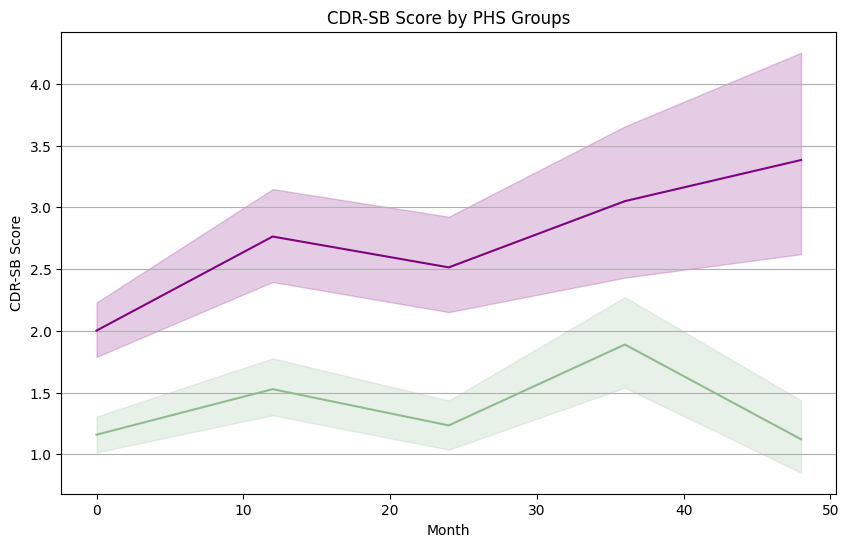

In [3]:
## PHS vs CDR-SB from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean CDR-SB score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['CDRSB'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['CDRSB'].sem().mul(1.96).reset_index()
df_negative_mean['CDRSB_lower'] = df_negative_mean['CDRSB'] - df_negative_ci['CDRSB']
df_negative_mean['CDRSB_upper'] = df_negative_mean['CDRSB'] + df_negative_ci['CDRSB']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['CDRSB'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['CDRSB'].sem().mul(1.96).reset_index()
df_positive_mean['CDRSB_lower'] = df_positive_mean['CDRSB'] - df_positive_ci['CDRSB']
df_positive_mean['CDRSB_upper'] = df_positive_mean['CDRSB'] + df_positive_ci['CDRSB']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the CDR-SB scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='CDRSB', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['CDRSB_lower'], df_negative_mean['CDRSB_upper'], color=colors[0], alpha=0.3)

# Plot the CDR-SB scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='CDRSB', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['CDRSB_lower'], df_positive_mean['CDRSB_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('CDR-SB Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('CDR-SB Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['CDRSB']
x_positive = df_positive[df_positive['VISCODE'] == '0']['CDRSB']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['CDRSB'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

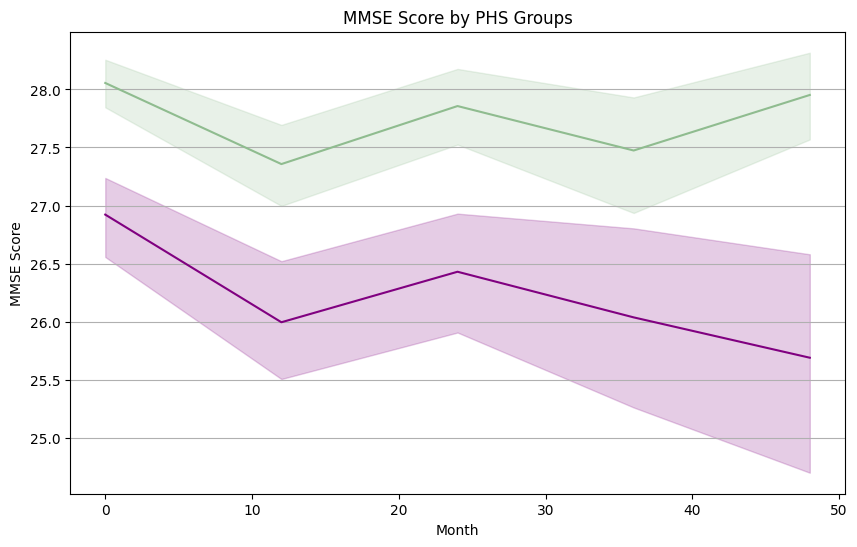

In [4]:
## PHS vs MMSE from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean MMSE score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['MMSE'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['MMSE'].sem().mul(1.96).reset_index()
df_negative_mean['MMSE_lower'] = df_negative_mean['MMSE'] - df_negative_ci['MMSE']
df_negative_mean['MMSE_upper'] = df_negative_mean['MMSE'] + df_negative_ci['MMSE']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['MMSE'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['MMSE'].sem().mul(1.96).reset_index()
df_positive_mean['MMSE_lower'] = df_positive_mean['MMSE'] - df_positive_ci['MMSE']
df_positive_mean['MMSE_upper'] = df_positive_mean['MMSE'] + df_positive_ci['MMSE']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the MMSE scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='MMSE', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['MMSE_lower'], df_negative_mean['MMSE_upper'], color=colors[0], alpha=0.3)

# Plot the MMSE scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='MMSE', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['MMSE_lower'], df_positive_mean['MMSE_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('MMSE Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('MMSE Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['MMSE']
x_positive = df_positive[df_positive['VISCODE'] == '0']['MMSE']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['MMSE'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

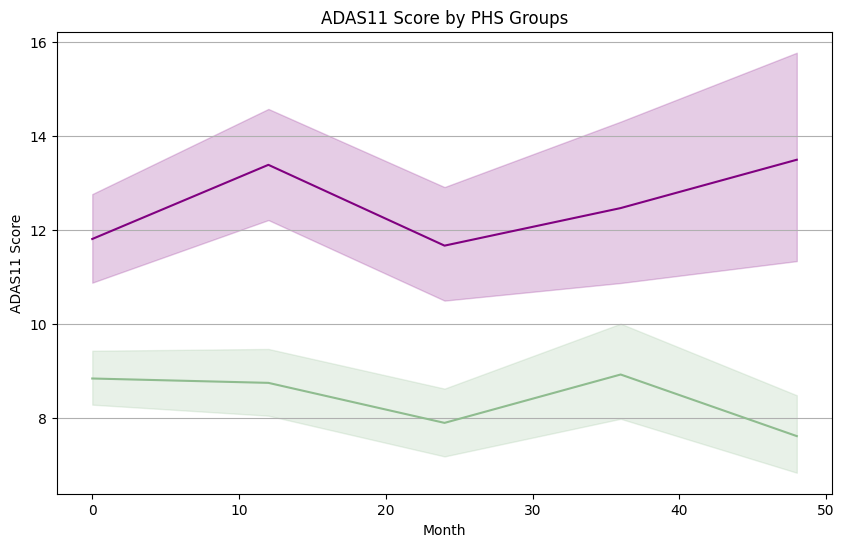

In [5]:
## PHS vs ADAS11 from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean ADAS11 score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['ADAS11'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['ADAS11'].sem().mul(1.96).reset_index()
df_negative_mean['ADAS11_lower'] = df_negative_mean['ADAS11'] - df_negative_ci['ADAS11']
df_negative_mean['ADAS11_upper'] = df_negative_mean['ADAS11'] + df_negative_ci['ADAS11']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['ADAS11'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['ADAS11'].sem().mul(1.96).reset_index()
df_positive_mean['ADAS11_lower'] = df_positive_mean['ADAS11'] - df_positive_ci['ADAS11']
df_positive_mean['ADAS11_upper'] = df_positive_mean['ADAS11'] + df_positive_ci['ADAS11']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the ADAS11 scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='ADAS11', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['ADAS11_lower'], df_negative_mean['ADAS11_upper'], color=colors[0], alpha=0.3)

# Plot the ADAS11 scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='ADAS11', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['ADAS11_lower'], df_positive_mean['ADAS11_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('ADAS11 Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('ADAS11 Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['ADAS11']
x_positive = df_positive[df_positive['VISCODE'] == '0']['ADAS11']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['ADAS11'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

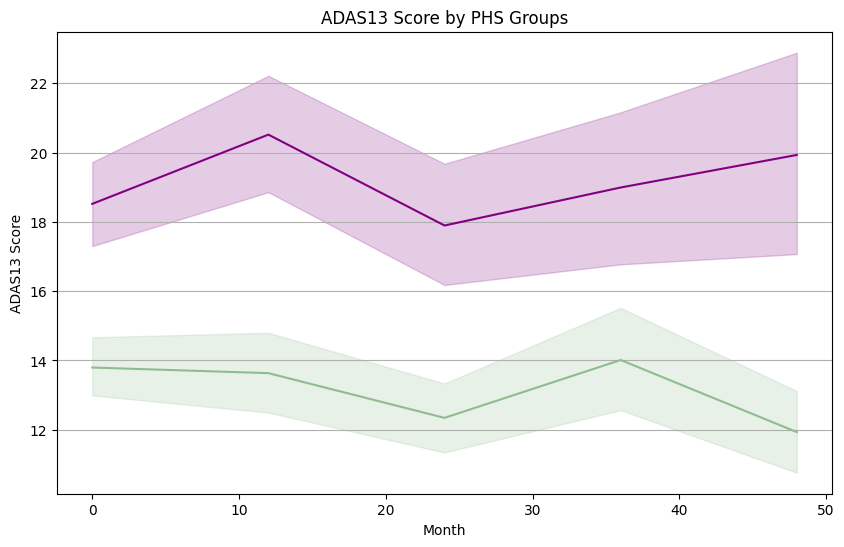

In [7]:
## PHS vs ADAS13 from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean ADAS13 score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['ADAS13'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['ADAS13'].sem().mul(1.96).reset_index()
df_negative_mean['ADAS13_lower'] = df_negative_mean['ADAS13'] - df_negative_ci['ADAS13']
df_negative_mean['ADAS13_upper'] = df_negative_mean['ADAS13'] + df_negative_ci['ADAS13']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['ADAS13'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['ADAS13'].sem().mul(1.96).reset_index()
df_positive_mean['ADAS13_lower'] = df_positive_mean['ADAS13'] - df_positive_ci['ADAS13']
df_positive_mean['ADAS13_upper'] = df_positive_mean['ADAS13'] + df_positive_ci['ADAS13']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the ADAS13 scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='ADAS13', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['ADAS13_lower'], df_negative_mean['ADAS13_upper'], color=colors[0], alpha=0.3)

# Plot the ADAS13 scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='ADAS13', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['ADAS13_lower'], df_positive_mean['ADAS13_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('ADAS13 Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('ADAS13 Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['ADAS13']
x_positive = df_positive[df_positive['VISCODE'] == '0']['ADAS13']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['ADAS13'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

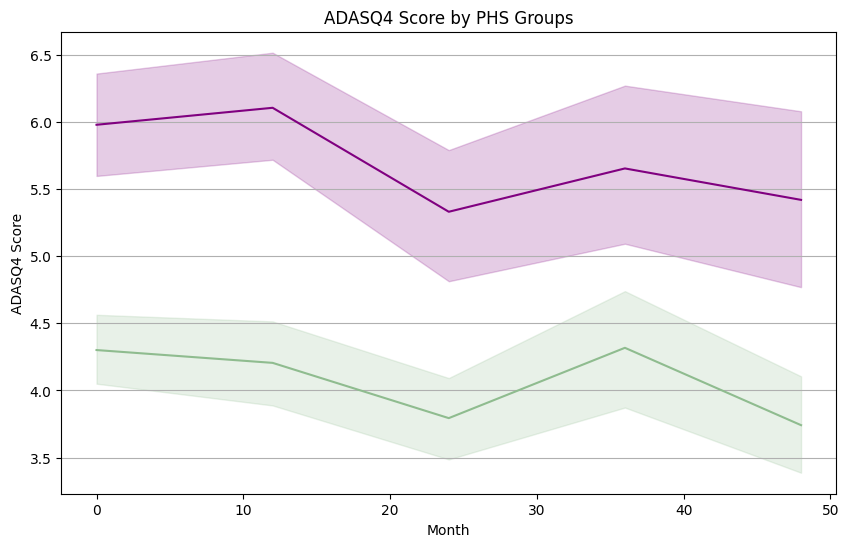

In [8]:
## PHS vs ADASQ4 from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean ADASQ4 score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['ADASQ4'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['ADASQ4'].sem().mul(1.96).reset_index()
df_negative_mean['ADASQ4_lower'] = df_negative_mean['ADASQ4'] - df_negative_ci['ADASQ4']
df_negative_mean['ADASQ4_upper'] = df_negative_mean['ADASQ4'] + df_negative_ci['ADASQ4']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['ADASQ4'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['ADASQ4'].sem().mul(1.96).reset_index()
df_positive_mean['ADASQ4_lower'] = df_positive_mean['ADASQ4'] - df_positive_ci['ADASQ4']
df_positive_mean['ADASQ4_upper'] = df_positive_mean['ADASQ4'] + df_positive_ci['ADASQ4']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the ADASQ4 scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='ADASQ4', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['ADASQ4_lower'], df_negative_mean['ADASQ4_upper'], color=colors[0], alpha=0.3)

# Plot the ADASQ4 scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='ADASQ4', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['ADASQ4_lower'], df_positive_mean['ADASQ4_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('ADASQ4 Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('ADASQ4 Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['ADASQ4']
x_positive = df_positive[df_positive['VISCODE'] == '0']['ADASQ4']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['ADASQ4'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

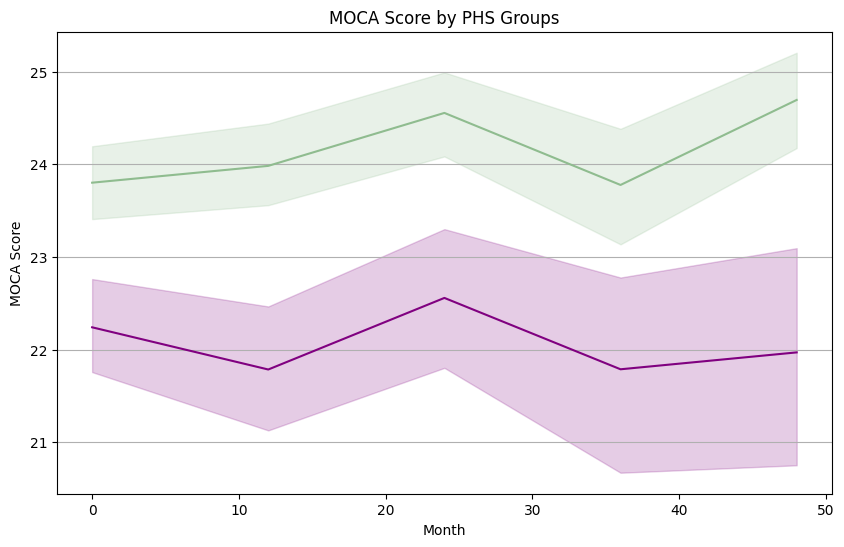

In [9]:
## PHS vs MOCA from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean MOCA score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['MOCA'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['MOCA'].sem().mul(1.96).reset_index()
df_negative_mean['MOCA_lower'] = df_negative_mean['MOCA'] - df_negative_ci['MOCA']
df_negative_mean['MOCA_upper'] = df_negative_mean['MOCA'] + df_negative_ci['MOCA']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['MOCA'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['MOCA'].sem().mul(1.96).reset_index()
df_positive_mean['MOCA_lower'] = df_positive_mean['MOCA'] - df_positive_ci['MOCA']
df_positive_mean['MOCA_upper'] = df_positive_mean['MOCA'] + df_positive_ci['MOCA']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the MOCA scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='MOCA', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['MOCA_lower'], df_negative_mean['MOCA_upper'], color=colors[0], alpha=0.3)

# Plot the MOCA scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='MOCA', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['MOCA_lower'], df_positive_mean['MOCA_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('MOCA Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('MOCA Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['MOCA']
x_positive = df_positive[df_positive['VISCODE'] == '0']['MOCA']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['MOCA'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

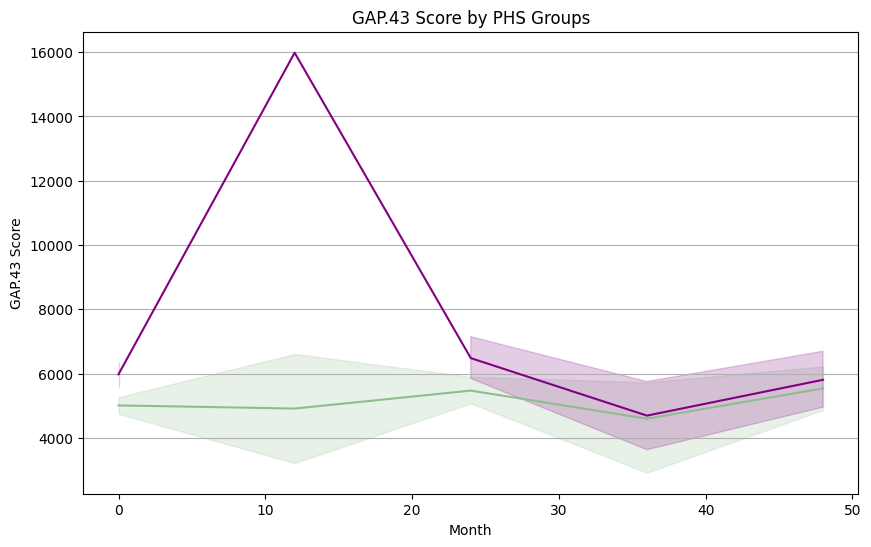

In [10]:
## PHS vs GAP.43 from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean GAP.43 score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['GAP.43'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['GAP.43'].sem().mul(1.96).reset_index()
df_negative_mean['GAP.43_lower'] = df_negative_mean['GAP.43'] - df_negative_ci['GAP.43']
df_negative_mean['GAP.43_upper'] = df_negative_mean['GAP.43'] + df_negative_ci['GAP.43']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['GAP.43'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['GAP.43'].sem().mul(1.96).reset_index()
df_positive_mean['GAP.43_lower'] = df_positive_mean['GAP.43'] - df_positive_ci['GAP.43']
df_positive_mean['GAP.43_upper'] = df_positive_mean['GAP.43'] + df_positive_ci['GAP.43']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the GAP.43 scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='GAP.43', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['GAP.43_lower'], df_negative_mean['GAP.43_upper'], color=colors[0], alpha=0.3)

# Plot the GAP.43 scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='GAP.43', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['GAP.43_lower'], df_positive_mean['GAP.43_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('GAP.43 Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('GAP.43 Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['GAP.43']
x_positive = df_positive[df_positive['VISCODE'] == '0']['GAP.43']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['GAP.43'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

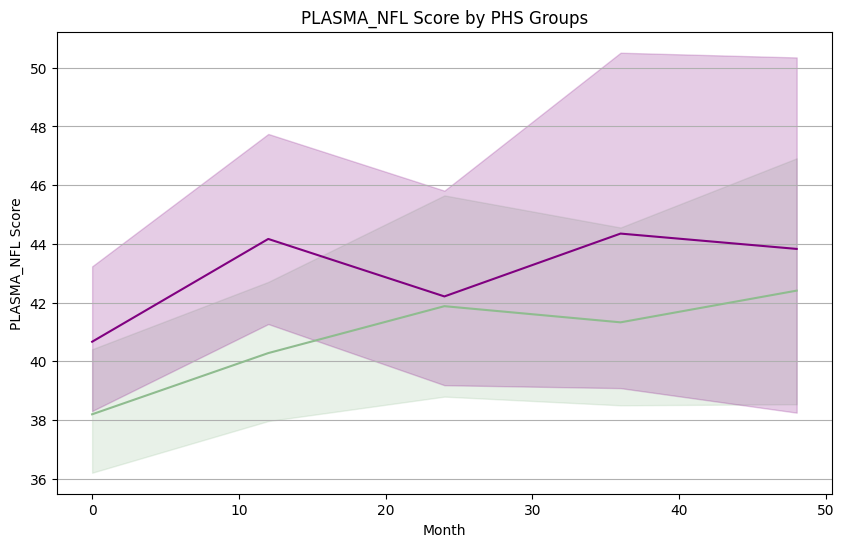

In [11]:
## PHS vs PLASMA_NFL from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean PLASMA_NFL score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['PLASMA_NFL'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['PLASMA_NFL'].sem().mul(1.96).reset_index()
df_negative_mean['PLASMA_NFL_lower'] = df_negative_mean['PLASMA_NFL'] - df_negative_ci['PLASMA_NFL']
df_negative_mean['PLASMA_NFL_upper'] = df_negative_mean['PLASMA_NFL'] + df_negative_ci['PLASMA_NFL']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['PLASMA_NFL'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['PLASMA_NFL'].sem().mul(1.96).reset_index()
df_positive_mean['PLASMA_NFL_lower'] = df_positive_mean['PLASMA_NFL'] - df_positive_ci['PLASMA_NFL']
df_positive_mean['PLASMA_NFL_upper'] = df_positive_mean['PLASMA_NFL'] + df_positive_ci['PLASMA_NFL']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the PLASMA_NFL scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='PLASMA_NFL', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['PLASMA_NFL_lower'], df_negative_mean['PLASMA_NFL_upper'], color=colors[0], alpha=0.3)

# Plot the PLASMA_NFL scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='PLASMA_NFL', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['PLASMA_NFL_lower'], df_positive_mean['PLASMA_NFL_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('PLASMA_NFL Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('PLASMA_NFL Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['PLASMA_NFL']
x_positive = df_positive[df_positive['VISCODE'] == '0']['PLASMA_NFL']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['PLASMA_NFL'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

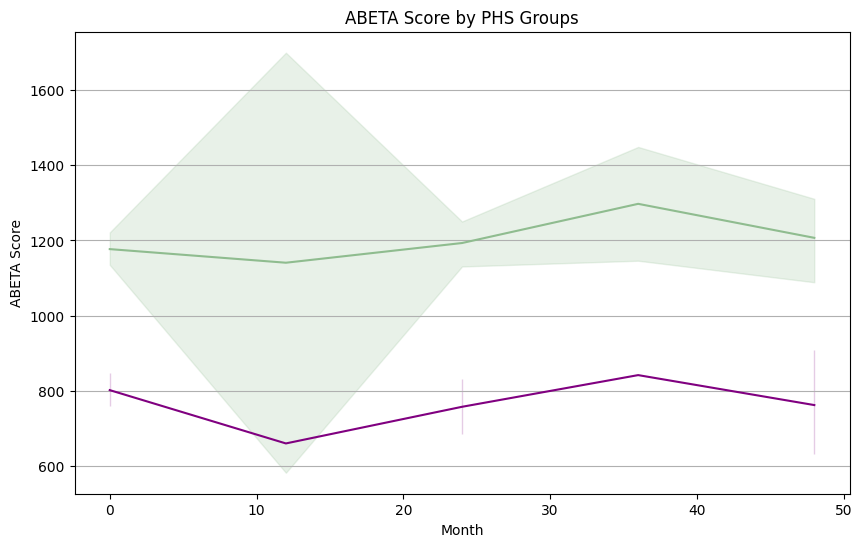

In [12]:
## PHS vs ABETA from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean ABETA score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['ABETA'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['ABETA'].sem().mul(1.96).reset_index()
df_negative_mean['ABETA_lower'] = df_negative_mean['ABETA'] - df_negative_ci['ABETA']
df_negative_mean['ABETA_upper'] = df_negative_mean['ABETA'] + df_negative_ci['ABETA']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['ABETA'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['ABETA'].sem().mul(1.96).reset_index()
df_positive_mean['ABETA_lower'] = df_positive_mean['ABETA'] - df_positive_ci['ABETA']
df_positive_mean['ABETA_upper'] = df_positive_mean['ABETA'] + df_positive_ci['ABETA']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the ABETA scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='ABETA', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['ABETA_lower'], df_negative_mean['ABETA_upper'], color=colors[0], alpha=0.3)

# Plot the ABETA scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='ABETA', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['ABETA_lower'], df_positive_mean['ABETA_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('ABETA Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('ABETA Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['ABETA']
x_positive = df_positive[df_positive['VISCODE'] == '0']['ABETA']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['ABETA'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

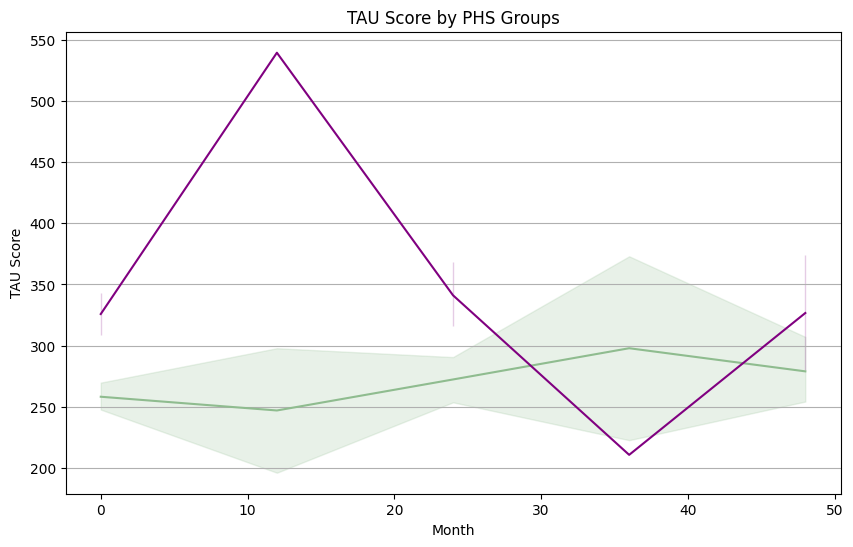

In [13]:
## PHS vs TAU from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean TAU score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['TAU'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['TAU'].sem().mul(1.96).reset_index()
df_negative_mean['TAU_lower'] = df_negative_mean['TAU'] - df_negative_ci['TAU']
df_negative_mean['TAU_upper'] = df_negative_mean['TAU'] + df_negative_ci['TAU']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['TAU'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['TAU'].sem().mul(1.96).reset_index()
df_positive_mean['TAU_lower'] = df_positive_mean['TAU'] - df_positive_ci['TAU']
df_positive_mean['TAU_upper'] = df_positive_mean['TAU'] + df_positive_ci['TAU']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the TAU scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='TAU', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['TAU_lower'], df_negative_mean['TAU_upper'], color=colors[0], alpha=0.3)

# Plot the TAU scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='TAU', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['TAU_lower'], df_positive_mean['TAU_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('TAU Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('TAU Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['TAU']
x_positive = df_positive[df_positive['VISCODE'] == '0']['TAU']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['TAU'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()

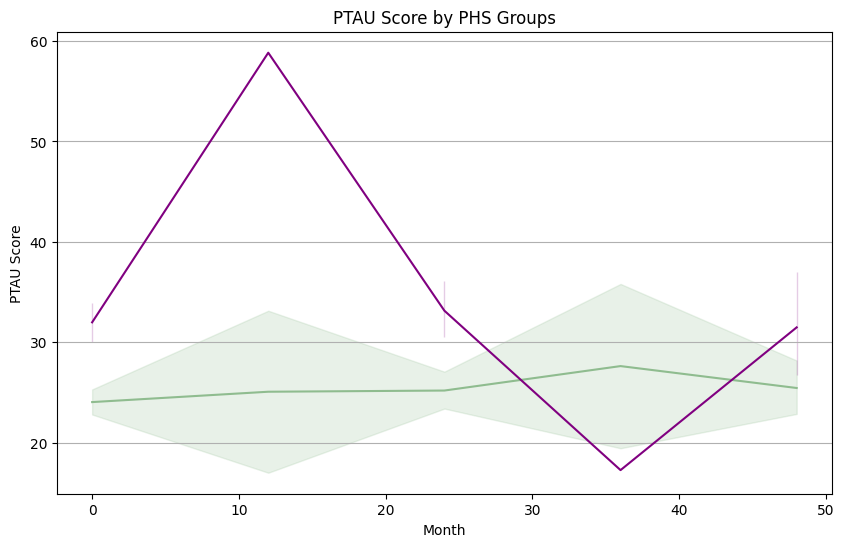

In [14]:
## PHS vs PTAU from baseline followed up to 48 month
# Filter the data based on PHS groups
df_negative = df[df['PHS'] <= 0.652]
df_positive = df[df['PHS'] > 0.652]

# Calculate the mean PTAU score and 95% CI for each combination of PHS group and VISCODE
df_negative_mean = df_negative.groupby(['PHS', 'VISCODE'])['PTAU'].mean().reset_index()
df_negative_ci = df_negative.groupby(['PHS', 'VISCODE'])['PTAU'].sem().mul(1.96).reset_index()
df_negative_mean['PTAU_lower'] = df_negative_mean['PTAU'] - df_negative_ci['PTAU']
df_negative_mean['PTAU_upper'] = df_negative_mean['PTAU'] + df_negative_ci['PTAU']

df_positive_mean = df_positive.groupby(['PHS', 'VISCODE'])['PTAU'].mean().reset_index()
df_positive_ci = df_positive.groupby(['PHS', 'VISCODE'])['PTAU'].sem().mul(1.96).reset_index()
df_positive_mean['PTAU_lower'] = df_positive_mean['PTAU'] - df_positive_ci['PTAU']
df_positive_mean['PTAU_upper'] = df_positive_mean['PTAU'] + df_positive_ci['PTAU']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the color palette
colors = ['darkseagreen', 'purple']

# Plot the PTAU scores with 95% CI for the PHS Negative group
sns.lineplot(data=df_negative_mean, x='VISCODE', y='PTAU', color=colors[0], ax=ax)
ax.fill_between(df_negative_mean['VISCODE'], df_negative_mean['PTAU_lower'], df_negative_mean['PTAU_upper'], color=colors[0], alpha=0.3)

# Plot the PTAU scores with 95% CI for the PHS Positive group
sns.lineplot(data=df_positive_mean, x='VISCODE', y='PTAU', color=colors[1], ax=ax)
ax.fill_between(df_positive_mean['VISCODE'], df_positive_mean['PTAU_lower'], df_positive_mean['PTAU_upper'], color=colors[1], alpha=0.3)

# Set the title and labels
ax.set_title('PTAU Score by PHS Groups')
ax.set_xlabel('Month')
ax.set_ylabel('PTAU Score')

# Perform Mann-Whitney U test and add p-value annotation
x_negative = df_negative[df_negative['VISCODE'] == '0']['PTAU']
x_positive = df_positive[df_positive['VISCODE'] == '0']['PTAU']

if len(x_negative) > 0 and len(x_positive) > 0:
    statistic, p_value = mannwhitneyu(x_negative, x_positive)
    if p_value < 0.001:
        p_text = '***'
    elif p_value < 0.01:
        p_text = '**'
    elif p_value < 0.05:
        p_text = '*'
    else:
        p_text = ''
    ax.annotate(f'p = {p_value:.3f} {p_text}', xy=(0, df['PTAU'].max()), xycoords='data')
else:
    ax.annotate('p-value N/A', xy=(0, 0), xycoords='data')

# Remove the vertical grid lines
ax.grid(axis='y')

# Display the plot
plt.show()